In [1]:
!git clone https://bitbucket.org/alms/classification-2022/src/master/

Cloning into 'master'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 101 (delta 35), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (101/101), 17.61 MiB | 15.94 MiB/s, done.
Resolving deltas: 100% (35/35), done.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [3]:
df = pd.read_csv('/content/master/data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [4]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [86]:
# ваш код

df_change = df.copy()
df_change['Day'] = df['Day'].apply(lambda x: x.year)
df_change.rename(columns={'Day': 'Year'}, inplace = True)

df_change = df_change.groupby(['Year'], as_index=False).apply(lambda x: x['t'].sum()/len(x))

df_change.columns.values[1] = 'average_temperature'

answer_min = df_change.loc[df_change['average_temperature'].idxmin()]
answer_max = df_change.loc[df_change['average_temperature'].idxmax()]

print(f'Самый холодный год: {int(answer_min[0])}, средняя температура: {answer_min[1]}')

print(f'Самый тёплый год: {int(answer_max[0])}, средняя температура: {answer_max[1]}')

Самый холодный год: 2012, средняя температура: 6.980821917808219
Самый тёплый год: 2015, средняя температура: 9.07945205479452


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [87]:
# ваш код

df_change = df.copy()

df_change['Year'] = df['Day'].apply(lambda x: x.year)
df_change['Month'] = df['Day'].apply(lambda x: x.month)
df_change['Day'] = df['Day'].apply(lambda x: x.day)

df_change = df_change[['t', 'Day', 'Month', 'Year']]

df_change = df_change[(df_change['Month'] == 1) & (df_change['t'] >= 0)][['Year', 'Day']].groupby(['Year'], as_index=False).count()

answer = df_change.loc[df_change['Day'].idxmax()]

print(f'Наибольшее число дней ({answer[1]}) с положительной температурой было в {answer[0]} году')

Наибольшее число дней (19) с положительной температурой было в 2008 году


**3.** В каком году было самое холодное лето (по средней температуре)

In [92]:
# ваш код

df_change = df.copy()

df_change['Year'] = df['Day'].apply(lambda x: x.year)
df_change['Month'] = df['Day'].apply(lambda x: x.month)
df_change['Day'] = df['Day'].apply(lambda x: x.day)

df_change = df_change[['t', 'Day', 'Month', 'Year']]

df_change = df_change[(df_change['Month'] >= 6) & \
                      (df_change['Month'] <= 8)]\
                      [['Year', 't']].groupby(['Year'], as_index=False).apply(lambda x: x['t'].sum()/len(x))

df_change.columns.values[1] = 't'

answer = df_change.loc[df_change['t'].idxmin()]

print(f'Самое холодное лето было в {int(answer[0])} году. Средняя температура: {answer[1]}')

Самое холодное лето было в 2008 году. Средняя температура: 18.119565217391305


**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [17]:
# ваш код

df_change = df.copy()

df_change['diff_t'] = df['t'].diff().shift(-1).apply(abs)

answer = df_change.loc[df_change['diff_t'].idxmax()]

print(f"Самый большой перепад составлял {answer[2]} градусов")
print(f"День с самым большим перепадом - {answer[0].date()}")

Самый большой перепад составлял 15.0 градусов
День с самым большим перепадом - 2014-05-26


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

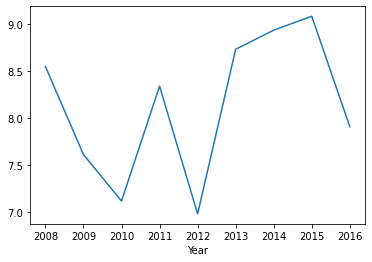

In [7]:
# ваш код

df_change = df.copy()

df_change['Year'] = df['Day'].apply(lambda x: x.year)

df_change = df_change[['Year', 't']]

df_change = df_change[['Year', 't']].groupby(['Year']).apply(lambda x: x['t'].sum()/len(x))

df_change.plot()